In [62]:
import matplotlib.pyplot as plt  
import numpy as np             
import pandas as pd            
import datetime as dt          
from matplotlib import style   
style.use('fivethirtyeight')  
%matplotlib inline            
 
# Import SQLAlchemy components
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [64]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:\\Users\\khali\\OneDrive\\Desktop\\GIT_HW\\SQL_Alchemy_Challenge\\SurfsUp\\Starter_Code\\Resources\\hawaii.sqlite")

In [65]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [66]:
# View all of the classes that automap found
measurementData = Base.classes.measurement
stationData = Base.classes.station

In [67]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [68]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [70]:
# Find the most recent date in the dataset
mrd= session.query(func.max(measurementData.date)).first()


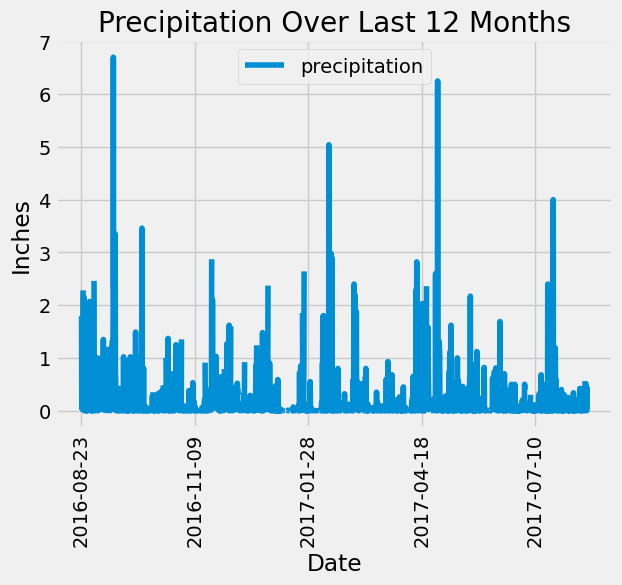

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurementData.date, measurementData.prcp).filter(measurementData.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns=['date', 'precipitation'])

# Sort the dataframe by date
sorted_df = prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(12,6))
sorted_df.plot(x='date', y='precipitation', rot=90)
plt.title("Precipitation Over Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [99]:
# Use Pandas to calculate the summary statistics for the precipitation data
print("\nPrecipitation Summary Statistics:")
sorted_df.describe()


Precipitation Summary Statistics:


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [103]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(stationData.station)).all()

[(9,)]

In [107]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurementData.station, func.count(measurementData.station)).\
    group_by(measurementData.station).order_by(func.count(measurementData.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [119]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(measurementData.tobs), func.max(measurementData.tobs), func.avg(measurementData.tobs)).filter(measurementData.station == 'USC00519281').all()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

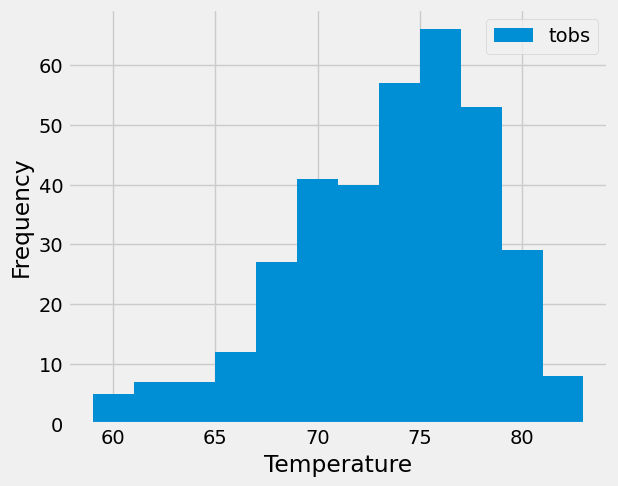

In [143]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

station_id = 'USC00519281'

results = session.query(measurementData.tobs).\
    filter(measurementData.station == 'USC00519281').\
    filter(measurementData.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

# Plot the histogram of temperature data
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()

# Close Session

In [146]:
# Close Session
session.close()